---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

Explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. 

Part 1 will look at regression and Part 2 will look at classification.

## Part 1 - Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
# part1_scatter()

Function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. 

In [2]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Your code here
    n_p = 100
    degrees = [1, 3, 6, 9]
    res = np.zeros([len(degrees), n_p])
    predict = np.linspace(0, 10, n_p).reshape(-1, 1)
    X_train_2 = X_train.reshape(-1, 1)
    
    for i, degree in enumerate(degrees):
        poly = PolynomialFeatures(degree=degree)
        X_ = poly.fit_transform(X_train_2)
        predict_ = poly.fit_transform(predict)
        reg = LinearRegression()
        reg.fit(X_, y_train)
        res[i, :] = reg.predict(predict_)
        
    return res

<IPython.core.display.Javascript object>


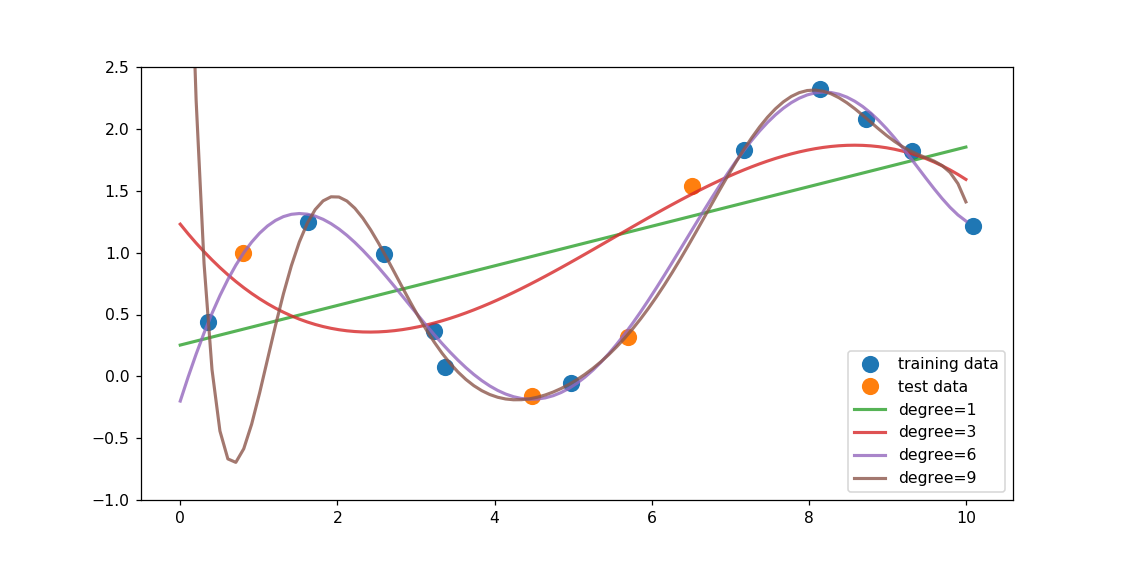

In [6]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

# plot_one(answer_one())

In [5]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    # Your code here
    degrees = np.arange(0, 10)
#     len_d = len(degrees)
#     res_train = np.zeros([len_d])
#     res_test = np.zeros([len_d])
    res_train = np.zeros([len(degrees)])
    res_test = np.zeros([len(degrees)])
    
    X_train_2 = X_train.reshape(-1, 1)
    X_test_2 = X_test.reshape(-1, 1)
    
    for i, de in enumerate(degrees):
        reg = LinearRegression()
        poly = PolynomialFeatures(degree=de)
        X_train_2_ = poly.fit_transform(X_train_2)
        X_test_2_ = poly.fit_transform(X_test_2)
        reg.fit(X_train_2_, y_train)
        res_train[i] = r2_score(y_train, reg.predict(X_train_2_))
        res_test[i] = r2_score(y_test, reg.predict(X_test_2_))

    return (res_train, res_test)

# answer_two()

(array([ 0.        ,  0.42924578,  0.4510998 ,  0.58719954,  0.91941945,
         0.97578641,  0.99018233,  0.99352509,  0.99637545,  0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247951, -0.64525377]))

In [22]:
def answer_three():
    
    # Your code here
    r2_Train, r2_test = answer_two()
    
    r2_Train_sorted = np.sort(r2_Train)
    r2_test_sorted = np.sort(r2_test)
    
    Underfitting = 0
    Overfitting = 0
    Good_Generalization = 0
    
    for deg, data in enumerate(zip(r2_Train, r2_test)):
        if data[0] < r2_Train_sorted[5] and data[1] < r2_test_sorted[5]:
            Underfitting = deg
        if data[0] >= r2_Train_sorted[5] and data[1] < r2_test_sorted[5]:
            Overfitting = deg
        if data[0] >= r2_Train_sorted[5] and data[1] >= r2_test_sorted[7]:
            Good_Generalization = deg
#         return deg, data # testing
    
#     return enumerate(zip(r2_Train, r2_test)) # testing
    return Underfitting, Overfitting, Good_Generalization

# answer_three()

In [24]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score

    # Your code here
    X_train_2 = X_train.reshape(-1, 1)
    X_test_2 = X_test.reshape(-1, 1)
    poly = PolynomialFeatures(degree=12)
    
    X_train_2_ = poly.fit_transform(X_train_2)
    X_test_2_ = poly.transform(X_test_2)
    
    # model 1
    linreg = LinearRegression()
    linreg.fit(X_train_2_, y_train)
    
    # model 2
    lasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_2_, y_train)

    return r2_score(y_test, linreg.predict(X_test_2_))  , r2_score(y_test, lasso.predict(X_test_2_))

# answer_four()

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.3120017974975458, 0.84066256147502361)

## Part 2 - Classification

Datasets stored in `readonly/mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br> 

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('readonly/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

# mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [35]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    # Your code here
    clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
    top_five = clf.feature_importances_.argsort()[::-1][:5] 
    
    return list(X_train2.columns[top_five])

# answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

In [37]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    # Your code here
    param_range = np.logspace(-4,1,6)

    clf = SVC(random_state=0)
    
    train_scores, test_scores = validation_curve(clf, 
                                                 X_subset, 
                                                 y_subset, 
                                                 param_name='gamma', 
                                                 param_range=param_range, 
                                                 cv=3, 
                                                 scoring="accuracy")

    return np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)

# answer_six()

(array([ 0.56647847,  0.93155951,  0.99039881,  1.        ,  1.        ,  1.        ]),
 array([ 0.56768547,  0.92959558,  0.98965952,  1.        ,  0.99507994,
         0.52240279]))

In [38]:
def answer_seven():
    
    # Your code here
    train_scores, test_scores = answer_six()
    
    train_scores_2 = np.sort(train_scores)
    test_scores_2 = np.sort(test_scores)
    
    Underfitting = 0
    Overfitting = 0
    Good_Generalization = 0
    
    param_range = np.logspace(-4, 1, 6)
    
    for gam, data in zip(param_range, zip(train_scores, test_scores)):
        if data[0] <= train_scores_2[1] and data[1] <= test_scores_2[1]:
            Underfitting = gam
        if data[0] > train_scores_2[1] and data[1] <= test_scores_2[1]:
            Overfitting = gam
        if data[0] == np.max(train_scores_2) and data[1] == np.max(test_scores_2):
            Good_Generalization = gam
    
    return Underfitting, Overfitting, Good_Generalization
    
# answer_seven()

(0.0001, 10.0, 0.10000000000000001)